# Individual State Correlation

## 1. Import Libraries and Data
## 2. Subset only US, then top 5 states
## 3. District of Columbia variable relationships
## 4. California variable relationships
## 5. Virginia Variable Relationship
## 6. Maryland Variable Relationship
## 7. Texas Variable Relationships
## 8. Final Conclusions

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'02 Data','prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 25)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,...,18.8,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,13,1,1,2,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,...,29.2,9.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,12.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,10.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,13.4,6.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA


In [7]:
df.dtypes

sub_agency              object
country                 object
age_level               object
education_level         object
pay_grade              float64
years_grouping          object
occupation              object
occupation_category     object
pay_plan                object
stem                     int64
supervisor_status       object
full_time               object
work_status             object
date                    object
salary                 float64
years_of_service       float64
age_level_code         float64
occupation_family       object
occupation_code        float64
agency                  object
education_code           int64
work_status_code         int64
full_time_code           int64
supervisor_code          int64
state                   object
dtype: object

### 2. Subset only US, then top 5 states

In [8]:
#filter only United States from subset

df_us =  df[df['country']=='United States']

In [9]:
df_us.shape

(1817308, 25)

In [10]:
df_us.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,...,18.8,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,13,1,1,2,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,...,29.2,9.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,12.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,10.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,13.4,6.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA


In [11]:
df_us.country.value_counts(dropna = False)

United States    1817308
Name: country, dtype: int64

In [12]:
#count values per state and group by state

total_count = df_us.groupby('state').state.count()

In [13]:
total_count.head()

state
ALABAMA        38600
ALASKA         10811
ARIZONA        31663
ARKANSAS       13135
CALIFORNIA    141103
Name: state, dtype: int64

In [14]:
total_count.shape

(51,)

In [15]:
total_count.sort_values()

state
VERMONT                   3087
DELAWARE                  3257
NEW HAMPSHIRE             4355
NORTH DAKOTA              5403
WYOMING                   5602
RHODE ISLAND              7732
CONNECTICUT               8144
SOUTH DAKOTA              8176
IDAHO                     8666
IOWA                      8783
MONTANA                   9253
NEBRASKA                  9603
ALASKA                   10811
MAINE                    11477
NEVADA                   12236
ARKANSAS                 13135
WEST VIRGINIA            16077
WISCONSIN                16242
MINNESOTA                16492
KANSAS                   16537
MISSISSIPPI              17878
LOUISIANA                18344
OREGON                   18438
NEW JERSEY               20795
KENTUCKY                 21214
NEW MEXICO               21526
SOUTH CAROLINA           22474
INDIANA                  23383
HAWAII                   23448
MASSACHUSETTS            24319
MICHIGAN                 26226
TENNESSEE                27541
UT

In [16]:
#Highest counts of workers are District of Columbia, California, Virginia, Marylaynd, Texas

In [17]:
#Subset each state to then view correlations

In [18]:
#filter only District of Columbia from subset

gov_DOC =  df_us[df_us['state']=='DISTRICT OF COLUMBIA']

In [19]:
gov_DOC.shape

(141157, 25)

In [20]:
#filter only California from subset

gov_CA =  df_us[df_us['state']=='CALIFORNIA']

In [21]:
gov_CA.shape

(141103, 25)

In [22]:
#filter only Virginia from subset

gov_VA =  df_us[df_us['state']=='VIRGINIA']

In [23]:
gov_VA.shape

(138535, 25)

In [24]:
#filter only Maryland from subset

gov_MD =  df_us[df_us['state']=='MARYLAND']

In [25]:
gov_MD.shape

(136121, 25)

In [26]:
#filter only Texas from subset

gov_TX =  df_us[df_us['state']=='TEXAS']

In [27]:
gov_TX.shape

(119537, 25)

### 3. District of Columbia variable relationships

In [28]:
import matplotlib.pyplot as plt

In [29]:
# Create a correlation matrix so I can see the table

gov_DOC.corr()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
pay_grade,1.000000,0.128668,0.894376,0.176122,0.212228,-0.518337,0.330902,-0.136237,-0.030248,-0.325941
stem,0.128668,1.000000,0.117168,-0.043465,0.009482,-0.295846,0.179021,-0.046179,0.008217,0.030824
salary,0.894376,0.117168,1.000000,0.322838,0.350408,-0.411996,0.345089,-0.111551,-0.013902,-0.415852
years_of_service,0.176122,-0.043465,0.322838,1.000000,0.620578,0.011640,-0.103569,-0.194362,-0.000785,-0.175078
age_level_code,0.212228,0.009482,0.350408,0.620578,1.000000,0.036768,-0.036529,-0.111137,0.018649,-0.158500
occupation_code,-0.518337,-0.295846,-0.411996,0.011640,0.036768,1.000000,-0.393429,0.034427,0.011784,0.043937
education_code,0.330902,0.179021,0.345089,-0.103569,-0.036529,-0.393429,1.000000,0.010653,-0.000762,-0.099781
work_status_code,-0.136237,-0.046179,-0.111551,-0.194362,-0.111137,0.034427,0.010653,1.000000,0.137371,0.061028
full_time_code,-0.030248,0.008217,-0.013902,-0.000785,0.018649,0.011784,-0.000762,0.137371,1.000000,0.018205
supervisor_code,-0.325941,0.030824,-0.415852,-0.175078,-0.158500,0.043937,-0.099781,0.061028,0.018205,1.000000


In [30]:
#Seaborn Heatmap of DOC data

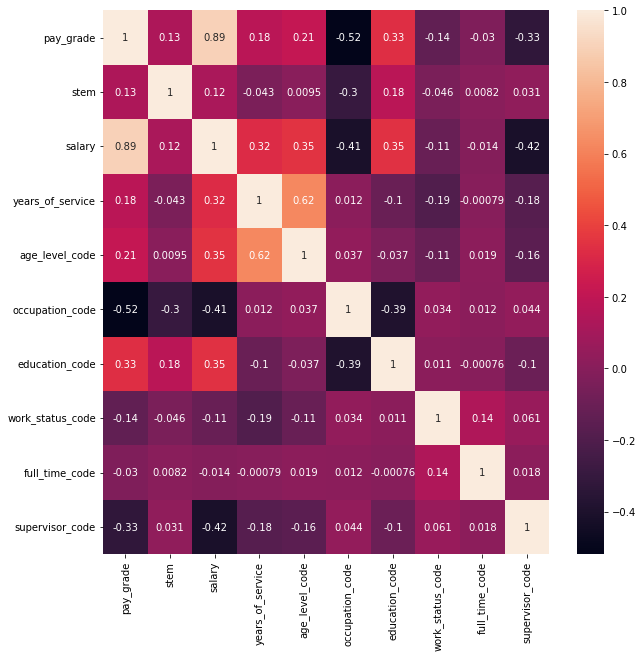

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(gov_DOC.corr(), annot = True, ax = ax) 

### 4. California variable relationships

In [32]:
# Create a correlation matrix so I can see the table

gov_CA.corr()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
pay_grade,1.000000,0.313411,0.883916,0.278057,0.189368,-0.730326,0.500696,-0.214350,-0.173030,-0.287419
stem,0.313411,1.000000,0.433200,-0.008438,-0.027162,-0.521264,0.410901,0.012728,0.066416,0.060363
salary,0.883916,0.433200,1.000000,0.274237,0.225044,-0.516855,0.461359,-0.039671,0.068142,-0.171658
years_of_service,0.278057,-0.008438,0.274237,1.000000,0.553158,-0.095510,0.016523,-0.185691,-0.091778,-0.204082
age_level_code,0.189368,-0.027162,0.225044,0.553158,1.000000,-0.022775,0.029593,-0.061139,0.035293,-0.103687
occupation_code,-0.730326,-0.521264,-0.516855,-0.095510,-0.022775,1.000000,-0.568443,0.026154,0.013862,0.003327
education_code,0.500696,0.410901,0.461359,0.016523,0.029593,-0.568443,1.000000,0.008777,-0.009741,-0.037286
work_status_code,-0.214350,0.012728,-0.039671,-0.185691,-0.061139,0.026154,0.008777,1.000000,0.641703,0.087293
full_time_code,-0.173030,0.066416,0.068142,-0.091778,0.035293,0.013862,-0.009741,0.641703,1.000000,0.070299
supervisor_code,-0.287419,0.060363,-0.171658,-0.204082,-0.103687,0.003327,-0.037286,0.087293,0.070299,1.000000


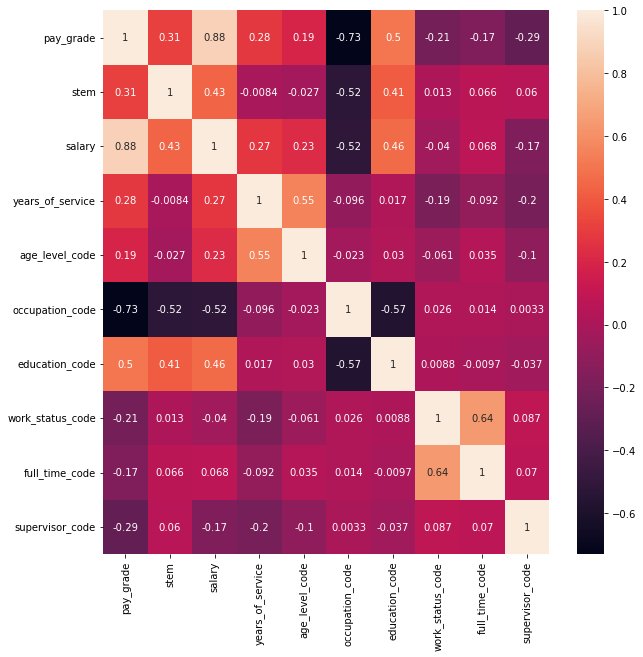

In [33]:
#Seaborn Heatmap of CA data
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(gov_CA.corr(), annot = True, ax = ax) 

### 5. Virginia Variable Relationship

In [34]:
# Create a correlation matrix so I can see the table

gov_VA.corr()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
pay_grade,1.000000,0.165054,0.882025,0.229529,0.191013,-0.601399,0.402995,-0.137681,-0.150165,-0.328280
stem,0.165054,1.000000,0.251456,-0.020009,-0.027460,-0.358958,0.260768,-0.039986,-0.040979,0.031436
salary,0.882025,0.251456,1.000000,0.325827,0.281867,-0.533142,0.474426,-0.070759,-0.103873,-0.332922
years_of_service,0.229529,-0.020009,0.325827,1.000000,0.521659,-0.103570,0.010213,-0.142410,-0.078812,-0.190861
age_level_code,0.191013,-0.027460,0.281867,0.521659,1.000000,-0.083185,0.033187,-0.028789,0.026913,-0.142387
occupation_code,-0.601399,-0.358958,-0.533142,-0.103570,-0.083185,1.000000,-0.531647,-0.002134,0.012572,0.073120
education_code,0.402995,0.260768,0.474426,0.010213,0.033187,-0.531647,1.000000,-0.058284,-0.082840,-0.111782
work_status_code,-0.137681,-0.039986,-0.070759,-0.142410,-0.028789,-0.002134,-0.058284,1.000000,0.645785,0.065484
full_time_code,-0.150165,-0.040979,-0.103873,-0.078812,0.026913,0.012572,-0.082840,0.645785,1.000000,0.070954
supervisor_code,-0.328280,0.031436,-0.332922,-0.190861,-0.142387,0.073120,-0.111782,0.065484,0.070954,1.000000


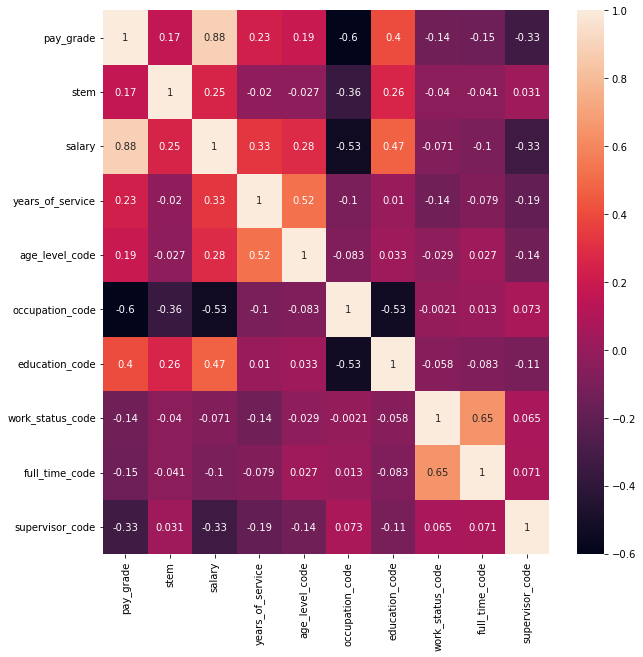

In [35]:
#Seaborn Heatmap of VA data
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(gov_VA.corr(), annot = True, ax = ax) 

### 6. Maryland Variable Relationship

In [36]:
# Create a correlation matrix so I can see the table

gov_MD.corr()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
pay_grade,1.000000,0.324246,0.888572,0.206812,0.203851,-0.620951,0.425150,-0.225078,-0.167122,-0.313232
stem,0.324246,1.000000,0.341717,-0.055556,0.031475,-0.507977,0.425171,0.145800,0.078666,-0.004872
salary,0.888572,0.341717,1.000000,0.349159,0.346604,-0.476221,0.411461,-0.031213,-0.079386,-0.407596
years_of_service,0.206812,-0.055556,0.349159,1.000000,0.562412,-0.016669,-0.106250,-0.170685,-0.096006,-0.198074
age_level_code,0.203851,0.031475,0.346604,0.562412,1.000000,-0.029437,0.009752,0.002564,0.087281,-0.123117
occupation_code,-0.620951,-0.507977,-0.476221,-0.016669,-0.029437,1.000000,-0.544644,-0.043386,0.002079,0.048835
education_code,0.425150,0.425171,0.411461,-0.106250,0.009752,-0.544644,1.000000,0.154188,0.050611,-0.086439
work_status_code,-0.225078,0.145800,-0.031213,-0.170685,0.002564,-0.043386,0.154188,1.000000,0.612788,0.064977
full_time_code,-0.167122,0.078666,-0.079386,-0.096006,0.087281,0.002079,0.050611,0.612788,1.000000,0.085730
supervisor_code,-0.313232,-0.004872,-0.407596,-0.198074,-0.123117,0.048835,-0.086439,0.064977,0.085730,1.000000


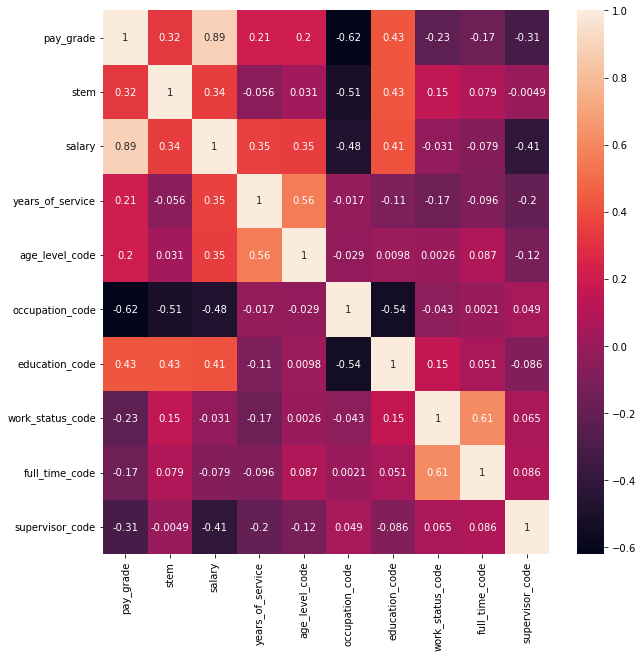

In [37]:
#Seaborn Heatmap of MD data
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(gov_MD.corr(), annot = True, ax = ax) 

### 7. Texas Variable Relationships

In [38]:
# Create a correlation matrix so I can see the table

gov_TX.corr()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
pay_grade,1.000000,0.308264,0.871406,0.285370,0.151106,-0.754592,0.519077,-0.271400,-0.224494,-0.312434
stem,0.308264,1.000000,0.392701,-0.037924,-0.010722,-0.474797,0.342686,-0.081680,-0.021710,0.054503
salary,0.871406,0.392701,1.000000,0.281924,0.182147,-0.500417,0.445492,-0.157292,-0.068157,-0.217086
years_of_service,0.285370,-0.037924,0.281924,1.000000,0.486386,-0.084381,0.029760,-0.235997,-0.116071,-0.201522
age_level_code,0.151106,-0.010722,0.182147,0.486386,1.000000,-0.030680,0.029247,-0.059120,0.014080,-0.106395
occupation_code,-0.754592,-0.474797,-0.500417,-0.084381,-0.030680,1.000000,-0.551445,0.113797,0.096362,0.010029
education_code,0.519077,0.342686,0.445492,0.029760,0.029247,-0.551445,1.000000,-0.151841,-0.100239,-0.074746
work_status_code,-0.271400,-0.081680,-0.157292,-0.235997,-0.059120,0.113797,-0.151841,1.000000,0.578338,0.074239
full_time_code,-0.224494,-0.021710,-0.068157,-0.116071,0.014080,0.096362,-0.100239,0.578338,1.000000,0.048720
supervisor_code,-0.312434,0.054503,-0.217086,-0.201522,-0.106395,0.010029,-0.074746,0.074239,0.048720,1.000000


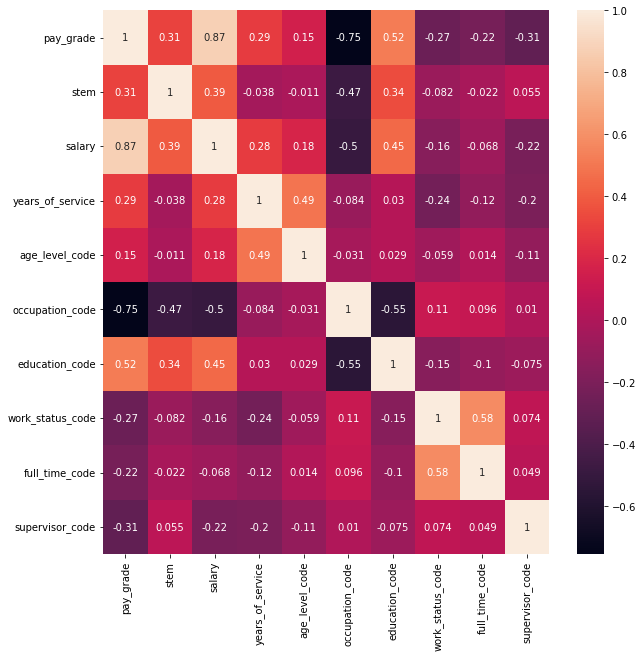

In [39]:
#Seaborn Heatmap of TX data
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(gov_TX.corr(), annot = True, ax = ax) 

## 8. Final Conclusions

### I broke down the data into the top 5 states with the most workers.  I was hoping this would show more variable relationships than just the 1 (salary and pay grade) from the overall data.

### I did see a few more relationships that emerged:

### Positive Relationships included: pay grade/salary - work status/full time - education code/ pay grade - years of service/age level 

### Negative Relationships included: pay grade/occupation code - stem/occupation code - education code / occupation code - as these are more categorical the negative doesn't show us much other than as education code increases the occupation code decreases, but then that translates to categories so doesn't help much.

### Once again I'm disappointed in the lack of correlation between variables.  We are still processing a lot of data, but you would think a higher education level would have a stronger correlation than a .5.  Also you would hope to see more of a correlation between work status (permanent worker or "other") or full time (full time/part time) vs pay grade or salary.  And you would think that years of service or age would also affect your pay.

In [13]:
#Export dataframe df_us for Tableau 
df_us.to_csv(os.path.join(path,'02 Data','prepared data','March 2022 clean-usa.csv'))